## Background / Motivation

The Vinho Verde region of northwest Portugal brings affordable wines of diverse flavor profiles and complexities to everyday individuals [1]. As this region continues to gain influence and grow as a wine exporter, it is crucial that wineyard and consumers proportionally scale their ability to determine the quality of each wine variant (a key metric in identifying a wine's price and how it will sell). Quality is an important metric used in a wine’s certification process in the market. A wine's quality helps vintners determine how to properly price a wine, as well as how to market it [2].

However, wine quality is (at least at the moment) largely determined by sommeliers [2]. Though these individuals are experts in wine-tasting, sommeliers too are humans with subjective opinions and personal preferences in taste. Therefore, the industry has begun to support the sommelier-determined measure of quality through the measurement of objective physicochemical properties of wines, such as pH and alcohol values.

In an effort to expand this practice, we built a series of models to predict sommelier-determined wine quality based on physicochemical properties of Vinho Verde wines. We were motivated to approach this topic in particular as all of our group members are bourgeoning young-adults of drinking age. Thus, we hoped to better learn about and understand wine practices through our project so that we may better approach our interactions with wine in the future. We are also all interested in the world of sommeliers and oenologists, and hope to  explore their practices and quality measurements through our research and modeling.

Given the great diversity in climate, grapes, and methods of winemaking in the Vinho Verde region and wine-production areas [1], this model would likely be generalizable when predicting the qualities of wines from other regions (especially those surrounding Vinho Verde). 

## Problem statement 

To approach our analysis, we first articulated our objective: to predict oenologist-determined wine qualities of Vinho Verde wines (on a 1 to 10 scale) using the physical and chemical attributes of those wines.

Although our objective involves predicting a response variable that has integer values from 1 to 10, we elected to approach this problem with regression (i.e., predicting the response on a continuous scale and rounding our predictions to integer values thereafter) instead of multi-classification.

We chose to approach this problem with regression because our response values (from 1 to 10) have an inherent order (as ordinal values), and the magnitude of the difference between consecutive values is meaningful. For example, the difference between "1" and "2" quality wines may be similar to the diffference between quality "9" and "10" wines. Regression helps to capture this relationship by considering the magnitude of the values. 


## Data sources

We elected to use data set entitled "Wine Quality Data Set" from the UCI Machine Learning Repository. The dataset can be accessed [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). This dataset helped us to address our project by comprehensively cataloging the different qualities of over 6,000 red and white variants of Portuguese "Vinho Verde" wine from 2004 to 2007. A wine's quality is based on its physicochemical properties, and this data set included 10 of such properties - thus reinforcing its use in our goal to predict wine quality.

Our response variable here was wine quality, represented by the variable quality in this dataset. This value ranged from 1 to 10. The predictors we used included physicochemical attributes of wine such as pH, density, fixed and volatile acidity, citric acid content, residual sugars, chlorides, free sulfur dioxides and total sulfur dioxides, sulphates, alcohol quality, and wine type (red or white). There are 11 total predictors in the dataset: 10 continuous predictors one categorical predictor. There are 6,497 total observations in this dataset, and each observation erepresents a different wine sample.

## Stakeholders

Our project addresses the interests of three stakeholder groups: (1) wine producers, (2) restaurants and bars, and (3) oenologists and sommeliers.

**Wine producers** have a vested interest in predicting a wine's quality, as often quality equates to both a wine's performance in the market and its return on investment, or ROI. Higher quality wines are typically expensive. They thus yield a higher ROI than lower quality wines - and this direclty impacts wine producers. Wine producers invest copious amounts of time and money into cultivating different wine variants. Thus, our project benefits these stakeholders by offering them a measure to predict a wine's quality with accuracy and reliability - information that they may then use to either gauge a wine's performance in the market or to choose how to best spend their time and money (perhaps on wines that are will be more expensive and will thus financially benefit them more).

**Restaurant and bar owners** who buy wine for their businesses may also be interested in assessing a wine’s quality. These stakeholders often buy wine from vineyards to sell in their businesses. They buy different wine variants with the goal of later selling them to customers for an upcharge. These stakeholders need to know the quality of the wines they are buying, as this metric informs how much restaurants and bars can charge for a given glass. Thus, our model may allow these stakeholders to assess the quality of the wines that they are considering for their establishments. By developing a model to predict a wine's quality, our project allows these stakeholders to not only assess a wine's quality overall (and thus figure out how to best market and charge for that wine), but also explore the range of wines to include (as, typically, restaurants include a variety of wine types and qualities - a "good mix" is encouraged to cater to diverse customer wants and needs).

Our third and final stakeholders include **oenologists and sommeliers**. Oenologists and sommeliers are currently working to establish defined measures for determining a wine's quality by evaluating its physiochemical characteristics. By incorporating these characteristics as predictors in our modeling processes, our project may offer these stakeholders a method to more easily and accurately determine a wine's quality through its make up - without having to spend exhaustive hours comparing one wine's composition to another's. This project offers a tool that, if accurate and reliable, could be leveraged by oenologists and sommeliers to better gauge the performance and quality of their industry's product.

## Data quality check / cleaning / preparation 

### Data Quality Check and Cleaning

Our response variable, wine quality (or `quality` as listed in the dataset) is a continuous variable with a standard deviation of 0.87 and a mean of 5.82. There are 11 continuous variables in this dataset. There are no missing values for any predictors, and all values seem plausible (for example, the minimum and maximum pH values fall within the pH scale). The original data was split into two separate datasets--one for white wine and one for red wine. We decided to merge these datasets into one and create a new categorical variable, `type`, to describe whether the wine was red or white. Most wines in the new merged dataset are white, representing 75% of all samples. (**See Appendix 0 Figure A.0.1 for a tabular distribution of all predictor variables in the dataset**).

The original data was split into two separate datasets--one for white wine and one for red wine. We decided to merge these datasets into one and create a new categorical variable, `type`, to describe whether the wine was red or white. Most wines in the new merged dataset are white, representing 75% of all samples (**See Appendix 0 Figure A.0.2 for a tabular distribution of our response variable**).

Interestingly, our response variable `quality` only had values between 3 and 9, meaning that there were no wines in this dataset of extremely low quality (i.e., 1 or 2 quality wines), or extremely high quality (like quality 10 wines). (**See Appendix 0 Figure A.0.3 for a visualized distribution of red and white wine qualities**)

### Data Preparation

We choose to use `MinMaxScaler` to scale the predictors. `StandardScaler` assumes that the distribution of the predictors are normal. From the QQ plots of the first four predictors, this assumption does not hold all predictors (a normally distributed predictor would have its values align closely with the 45 degree line) (**See Appendix 0 Figure A.0.4 for QQ plots of our first four predictor variables**). The QQ plots of our other 10 predictor variables also did not clearly follow the 45 degree line. 

"MinMaxScaler scales the data to a fixed range, typically between 0 and 1. On the other hand, StandardScaler rescales the data to have a mean of 0 and a standard deviation of 1. This results in a distribution with zero mean and unit variance."[4]

## Exploratory data analysis

Our insights from our exploratory data analysis process were as follows: 

- **Insight 1**: The predictor distributions were not normal--residual sugar had a skewed distribution and total sulfur dioxide had a bimodal distribution. Thus, we scaled the predictors using MinMaxScaler instead of StandardScaler because the latter assumes that the predictors have normal distributions, which is not true for our dataset. MinMaxScaler scales the data to a range of 0 to 1 whereas StandardScaler scales the data to have a mean of 0 and standard deviation of 1 (**See Appendix 0 Figure A.0.5 for graphical distributions of our predictors**).

- **Insight 2**: Alcohol, volatile acidity, and density showed distinct trends with wine quality, suggesting that these might be useful predictors. These predictors also had the highest correlation with wine quality (**See Appendix O Figure A.0.6 for alcohol, density, and volatile acidity plotted against quality**).

## Approach

### Model Choice and Metrics to Optimize 

When modeling, we chose to implement almost all of the models we learned this quarter. Our base models included (1) MARS, (2) Decision Trees, (3) Bagging Decision Trees, (4) Random Forests, (5) AdaBoosting, (6) Gradient Boosting, (7) XGBoosting. We also used Lasso and Ridge regression models and linear base models to evaluate our nonlinear base model performance from a comparative lens. In later modeling, we elected to implement CatBoost and LightGBM modeling (with default parameters) to evaluate whether more advanced boosting models could improve our overall model performance. 

We chose the following metric to optimize: Root Mean Squared Error (or RMSE). When working with regression models, we had two choices in terms of metrics to optimize: Mean Squared Error (MAE) or RMSE. MAE tends to penalize all errors equally, whereas RMSE penalizes larger errors more than smaller ones. 

We wanted to understand and accurately predict the quality of each individual wine sample from our dataset. Thus, we wanted the error of each individual prediction to be minimized, and for our performance metric to be particularly sensitive to larger errors. RMSE accomplishes this by penalizing larger errors more than smaller ones. Further, we found that wines of similar quality scores had similar prices, and we wanted to reflect that trend in our optimization process. Thus, if our model predicted a quality 3 wine as a quality 9 wine, we wanted to penalize that error ***more*** than if that same quality 3 wine was predicted as a quality 4 wine. The difference in quality and price between 3 and 9 quality wines is far larger than that between a quality 3 and quality 4 wine.

### Any Unorthodox Methods 

Perhaps the only unorthodox component to our approach is that we elected to address this study using regression instead of multi-classification. We chose regression here because our response variable `quality` has a natural order. By treating the response variable as a continuous variable, our regression modeling process can preserve the ordering of the values, which is crucial in this context. In multi-class classification, models learn to classify data into distinct categories without considering the specific ordering or relationship between the classes. Because the ordering of our response variable holds meaningful information, we found that multi-class classification may not adequately capture this relationship (and thus opted for regression, which is a bit unorthodox considering that our response variable contains integer values or classes).

### Anticipated Problems

After examining the distribution of the response variable (and noting that our dataset had many mid-quality 5, 6, and 7 wines but far fewer very low or very high quality wines), we anticipated that it might be difficult (given our data) to accurately predict values for very high or very low quality wines -- just due to the lack of observations available for those classes. 

In our modeling process, one challenge we encountered was that our models' RMSE values stubbornly stayed around 0.6 or 0.7. As our response variable lies on a 1 to 10 scale, this range of RMSE values is largely suboptimal, and means that our model (with rounding) is, on average, predicting values that deviate from the true values by approximately 0.6 to 0.7 quality units. That's not great on a 1 to 10 scale. Though we implemented a multitude of different modeling processes and attempted to round our values accordingly, we were unable to get below a 0.6 RMSE. This challenge may have been due to the nature of our dataset or due to the relationship between our response and predictors.

### Existing Solutions

There are several existing solutions to our problem, as we are using an established data set from the UCI Machine Learning Library. There are 1408 dataset notebooks on Kaggle of various qualities and completeness that use this data set in some regard. 

We sought to improve upon existing solutions by implementing ensemble modeling with 8 different modeling methods. Existing solutions on Kaggle largely address this problem by using a single modeling method. By implementing ensemble modeling and leveraging different modeling methods, we hoped to outperform existing Kaggle solutions. The highest accuracy that a published Kaggle notebook has achieved when using this dataset to predict wine quality is 91% using Random Forest modeling methods. 

It is difficult for us to compare our model to existing solutions as we performed regression and optimized for RMSE, rather than accuracy. We chose to perform regression and round to integer values because we have not learned multi-class classification and because we were curious if this alternative approach might help us create a better model. Though there are existing Kaggle notebooks that address this problem, we did not draw on or cite them them in our modeling process.

## Developing the model: Hyperparameter tuning

### Intercept Base Model
*By Anastasia Wei*

For the intercept base model, I took the mean of the train data response as the intercept and rounded the mean to be the predicted test response. This intercept model gave a RMSE of 0.9327.

### Ridge and Lasso Regression
*By Anastasia Wei*

For Ridge Regression, I used the `Ridge` modulo from `sklearn` package. I chose a range from 15.8 to 5e-4 (`10**np.linspace(1.5,-3,200)*0.5`) as the tunning parameter alpha, and tuned the model using used `RidgeCV`. The optimal alpha = 0.01636 and results in a test RMSE pf 0.8167.

For Lasso Regression, I used `Lasso` modulo from `sklearn` package. I chose a range from 0.5 yo 5e-6 (`10**np.linspace(2,-5,200)*0.5`) as the tunning parameter alpha, and tuned the model using a for loop looping over the parameters optimizing for model RMSE. The optimal alpha is found to be 0.0004301732208342255 results in a train rmse of 0.7806 and test rmse of 0.8138. (*See below for a plot of the train RMSE vs alpha*).

<div style="text-align: center;">
   <img width="40%" height="40%" src="imgs/alpha-v-train-rmse.png">
</div>

### MARS
*By Lila Wells*

I approached the MARS modeling process in three parts: (1) a coarse grid search to optimize `max_terms` and `max_degree`, (2) a fine grid search to optimize the same hyperparameters, and (3) building a residual model to predict the optimized model's residuals.

#### Coarse Grid Search 

I began the coarse grid search process with a nested for loop search over `max_terms` and `max_degree`. I iterated over the following hyperparameter values: 

After running the nested for loop search to optimize both hyperparameters simultaneously, I found the optimal `max_terms` value to be 400 and the optimal `max_degree` value to be 5. However, after computing this model's test RMSE, I was surprised to find that it was quite high: 1.566 quality units. Thus, I moved on to a finer grid search over a narrower set of hyperparameters.

#### Fine Grid Search

In the finer grid search, I iterated over the following range of hyperparameter values:

After running this nested for loop search to optimize both hyperparameters simultaneously, I found the optimal `max_terms` value to be 800 and the optimal `max_degree` value to be 7. This yielded a test RMSE of 0.790 -- far better than the RMSE of the original coarse grid search. 

Though both the optimal `max_terms` and `max_degree` in this fine grid search lied at the top of the range of hyperparameters I considered, they ultimaltey proved to be the best. I attempted several other fine grid searched over higher ranges to validate that 800 and 7 were the optimal values for `max_terms` and `max_degree` respectively, though to little avail (as the test RMSE increased as these hyperparameters were increased). Thus, this fine grid search proved to be the best in terms of determining the optimal hyperparameters for the MARS model.

Though, I still wanted to see if I could decrease the model's RMSE even further. Thus, I decided to build a model to predict the residuals of my MARS model -- so that I could essentially anticipate and correct for that model's error. 

#### Residual Model

Before building the residuals model, I began first by plotting the residuals of the optimized MARS model itself (**See Appendix 1 Figure A.1.1 for plotted residuals against train data predictions**). The residuals seeemed to be somewhat evenly distributed on either side of the line `y = 0`. 

I created the residuals model by fitting an `Earth()` instance with the predictions of my MARS model on train data as `X` (or the predictor) and the train data residuals of my MARS model (i.e., the difference between predicted values and actual values) as `y`, or the response. The residual model itself had an RMSE of 0.76 (slightly better than the performance of my MARS model). 

I then used the residual model to make predictions. I did so by feeding the model the test predictions of the MARS model (to output the predicted residuals). I then added those residuals to my test data predictions for a combined RMSE od 0.777 (a slight decrease in RMSE from the MARS model's of 0.790)

### Decision Tree
*By Kaitlyn Hung*

First, I trained an untuned tree model and found that the depth was 27 and there were 1,469 leaves. Next, I tuned hyperparameters `max_depth`, `max_leaf_nodes`, and `min_samples_leaf` using the untuned tree model to determine hyperparameter ranges to consider. I used `GridSearchCV()` with 5 fold cross validation optimized for `neg_mean_squared_error` (or RMSE). I used the following hyperparameter values: 

In [ ]:
# Coarse grid search parameters
'max_depth': np.arange(2,27, 5)
'max_leaf_nodes': np.arange(100, 1500, 250)
'min_samples_leaf': np.arange(1,10,2)

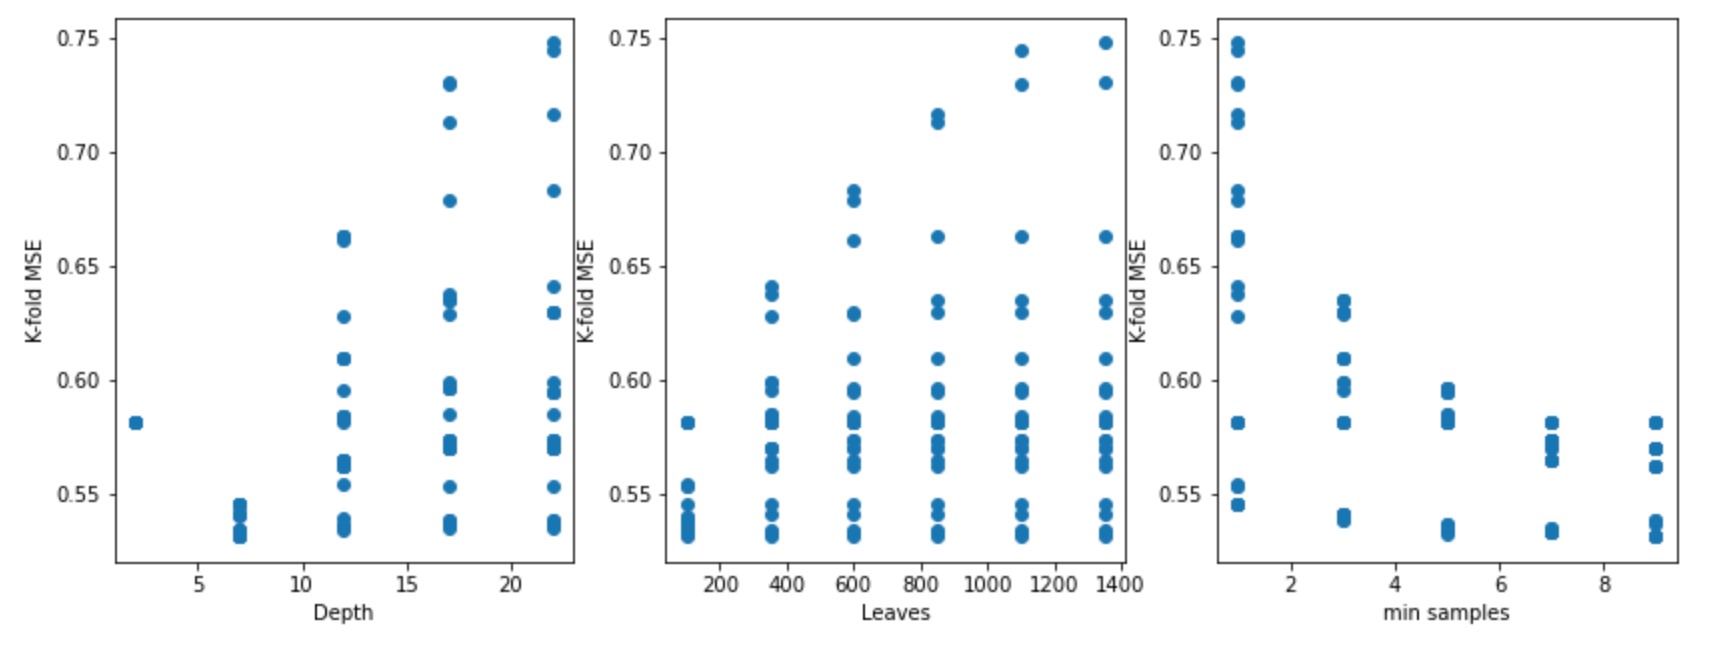

From this coarse grid search, I found that the best parameters were a `max_depth` of 7, `max_leaf_nodes` of 100, and `min_samples_leaf` of 9. As some of these values were at the end of the range of values I considered, I did a fine grid search. I considered the following hyperparameter ranges: 

In [ ]:
# Fine grid search parameters
fine_grid = {    
    'max_depth': range(3,12),
    'max_leaf_nodes': np.arange(2, 127, 25),
    'min_samples_leaf': [8, 9, 10]
}

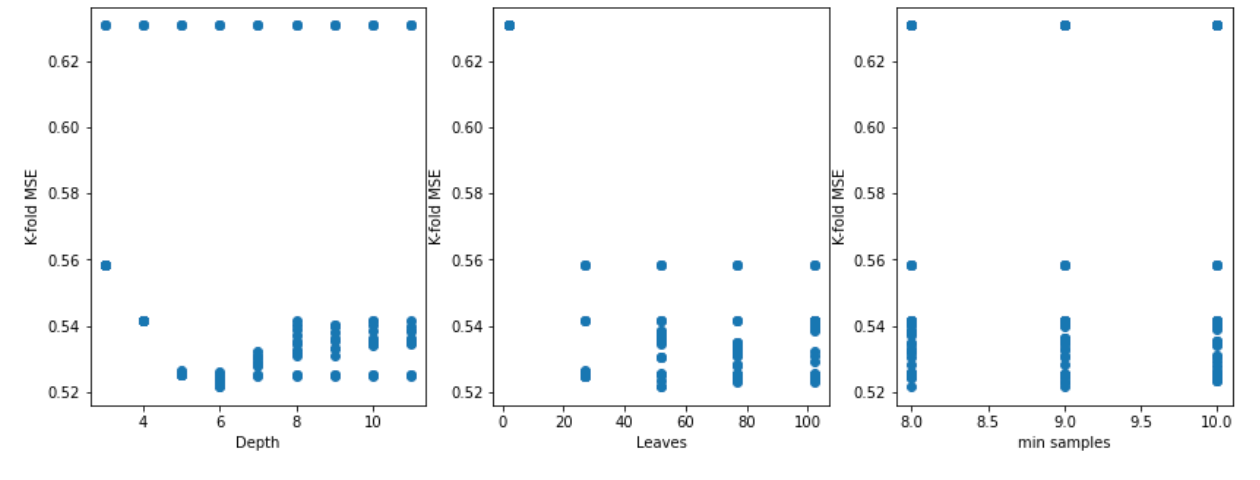

This `GridSearchCV()` gave optimal values of `max_depth` = 6, `max_leaf_nodes` = 52, and `min_samples_leaf` = 8. I trained a decision tree regressor using these optimal hyperparameter values. Then, I used this model to predict the quality of test data, rounding values to the closest integer. This gave me an RMSE of 0.804.

### Bagging Decision Trees
*By Lila Wells*

I approached the bagging model in two phases (1) a coarse grid search to identify the optimal hyperparameter space, and (2) a finer grid search to optimize hyperparameters. Yet before both steps, I wanted to determine (roughly) the number of trees that would be needed to stabilize the model's R-squared and RMSE. 

In the set of graphs below, I plotted the number of trees versus the out of bag RMSE and test RMSE (**See Appendix A.2, Figure A.2.1**). I noted that, while the test and out-of-bag R-squard trendlines seem to intersect and start to stabilize after the number of trees exceeds ~400, the out-of-bag and test RMSE trendlines seem to stabilize a little later, after around 500 trees. Thus, I chose 500 as my lower bound for `n_estimators` for the hyperparameter space.

#### Coarse Grid Search

I elected to optimize the following parameters: (1) n_estimators, (2) max_samples, (3) max_feautres, (4) bootstrap, and (5) bootstrap features. I considered the following ranges of hyperparamteters in my initial coarse grid search: 

In [ ]:
# Parameters for the coarse grid search
'estimator': [DecisionTreeRegressor(random_state = 1), DecisionTreeRegressor(random_state = 1, max_depth = 6), DecisionTreeRegressor(random_state = 1, max_depth = 10)],
'n_estimators': range(500, 1001, 100),
'max_samples': [0.5, 0.75, 1.0],
'max_features': [0.5, 1.0],
'bootstrap': [True, False],
'bootstrap_features': [True, False]}

I considered three different types of decision trees. The first was a base decision tree with `random_state = 1` and no specified `max_depth` or other hyperparameters. The second tree had a `max_depth` of 6 (the optimal value found in Kaitlyn's decision tree optimization process. I included that tree to test whether specifying `max_depth` could have a beneficial impact on the model's RMSE. The final tree had a `max_depth` of 10, and was included as a way to test whether specifying an additional hyperparameter could yield postiive results in the search process. 

I then used the above parameters as a grid to iterate through using `GridSearchCV()` and 2 fold cross-validation (to minimize runtime and identify the range of hyperparameters to focus in on in my finer grid search). 

This coarse grid search identified the following optimal hyperparameters: (1) `estimator`: DecisionTreeRegressor(random_state = 1), (2) `n_estimators`: 1000, (3) `max_samples`: 0.75, (4)`max_features`: 1.0, (5) `bootstrap`: False, (6) `bootstrap_features`: True

With these hyperparameters, the model yielded a 0.667 test RMSE. I graphed and inspected the results of the `GridSearchCV()` search with 2-fold cross validation to identify which distributions I should inspect for my finer grid search (in an effort to reduce the model's RMSE). (**See Appendix A.2. Figure A.2.2**). 

#### Finer Grid Search

Based on the above graphs and the optimal hyperparameters identified in my coarse grid search, I altered my hyperparameter distribution for the finer grid search as follows:

In [ ]:
'estimator': [DecisionTreeRegressor(random_state = 1)], # Narrowing this search space baesed on coarse grid results
'n_estimators': range(800, 1101, 60),, # Narrowing this search space based on coarse grid results
'max_samples': [0.6, 0.75, 0.9], # Narrowing this search space based on coarse grid results
'max_features': [0.5, 0.75, 0.85, 1.0] # Narrowing this search space based on coarse grid results
'bootstrap': [True, False],
'bootstrap_features': [True, False]}

I then used the above parameters as a grid to iterate through using `GridSearchCV()` and 2 fold cross-validation (to minimize runtime and identify the range of hyperparameters to focus in on in my finer grid search). 

This coarse grid search identified the following optimal hyperparameters: (1)`estimator`: DecisionTreeRegressor(random_state = 1), (2) `n_estimators`: 1040, (3) `max_samples`: 0.75, (4) `max_features`: 0.75, (5) `bootstrap1: False, (6) `bootstrap_features`: False

With these hyperparameters, the model yielded a 0.665 test RMSE, a slight improvement from my original RMSE of 0.667. I graphed and inspected the results of the `GridSearchCV()` search with 2-fold cross validation to better inspect the distributions of my hyperparameter values (**See Appendix A.2. Figure A.2.3**). 


<div style="text-align: center;">
   <img width="80%" src="imgs/bagging-fine-search.png">
</div>

I attempted several more grid searches with different values for `n_estimators` (as my optimal `n_estimators` value of 1040 was at the upper range of that hyperparameter space in the fine grid search). However, the test RMSE of my model did not improve. Thus, this fine grid search yielded the optimal hyperparameters for this model.

### Random Forest
*By Amy Wang*

I start by conducting a GridSearchCV to determine the optimal number of `max_features`, and find that 3 features is optimal.
> `max_features`: range(1, 14, 1)

I then manually create a few different models with 3 features and varying numbers of `n_estimators`. I find that 4000 estimators gave the lowest test RMSE.
> 900 estimators: 0.6725382459813659 <br>
> 4000 estimators: 0.6592536572635639 <br>
> 6000 estimators: 0.6604194471348085 <br>

I next try holding `max_features = 3` and `n_estimators = 4000` constant, while tuning for `max_depth` and `max_samples`. 

> params = {'n_estimators': [4000], <br>
>          'max_features': range(1, 14, 2), <br>
>          'max_depth': [3], <br>
>          'max_samples': range(1, X_train.shape[0], 500)}

The optimal combination of parameters returned by RandomizedSearchCV `{'n_estimators': 4000, 'max_samples': 501, 'max_features': 9, 'max_depth': 3}` gave an RMSE that was significantly higher than my base RMSE: 0.7975925314055079.

I decide to then attempt to tune all four parameters simultaneously with RandomizedSearchCV.

> params = {'n_estimators': range(100, 5000, 100), <br>
>          'max_features': range(1, 14, 2), <br>
>          'max_depth': range(2,30, 2), <br>
>          'max_samples': range(1, X_train.shape[0], 500)}

<div style="text-align: center;">
   <img width="60%" height="60%" src="imgs/rf_grid.png">
</div>

The optimal combination of parameters was `{'n_estimators': 1700, 'max_samples': 4001, 'max_features': 7, 'max_depth': 20}`, which gave a test RMSE of 0.6821910402406465. This was higher than the `{'n_estimators': 4000, 'max_features': 3}` model's RMSE, so I manually increase `n_estimators` and tune `max_depth` based on the decreasing trend in the plot.

> {'n_estimators': 3700, 'max_samples': 5000, 'max_features': 7, 'max_depth': 20} - Test RMSE 0.6713934992009014 <br>
> {'n_estimators': 5000, 'max_samples': 5000, 'max_features': 7, 'max_depth': 35} - Test RMSE 0.6702467972551374 <br>
> {'n_estimators': 4000, 'max_samples': 5000, 'max_features': 7, 'max_depth': 50} - Test RMSE 0.6690981300917733 <br>


Overall, the best random forest model was `{'n_estimators': 4000, 'max_features': 3}`, which had an RMSE of 0.6592536572635639.

### AdaBoost
*By Kaitlyn Hung*

I optimized the following hyperparameters: `n_estimators`, `learning_rate`, and `max_depth` of the base estimator using `GridSearchCV()` to identify the optimal hyperparameter values. In my coarse grid search, I considered the following ranges: 

In [ ]:
# Coarse grid search parameters considered
grid['n_estimators'] = [10, 50, 100,200]
grid['learning_rate'] = [0.0001, 0.001, 0.01,0.1, 1.0]
grid['base_estimator__max_depth'] = [3, 5, 10, 15]

This gave the optimal hyperparameters to be a `max_depth` of 15, `n_estimators` as 200, and `learning_rate` as 1 (**See Appendix A.5, Figure A.5.1 for visualized findings of this initial hyperparameter search**). These were the max values I considered for each of the hyperparameters, so I did another grid search, increasing the values I considered (**Refer to appendix A.5, sections A.5.2 and A.5.3 for the next two grid searches**). After performing two more grid searches, the optimal values of some of the hyperaprameters were at the end of of the range, so I increased the values I considered. I tuned `max_depth` and `learning_rate` separately from `n_estimators` as thus far, the highest value of `n_estimators` has been best. 

In [ ]:
# Learning rate and max depths considered
grid['learning_rate'] = [1.25, 1.5, 2]
grid['base_estimator__max_depth'] = [12, 13, 14]

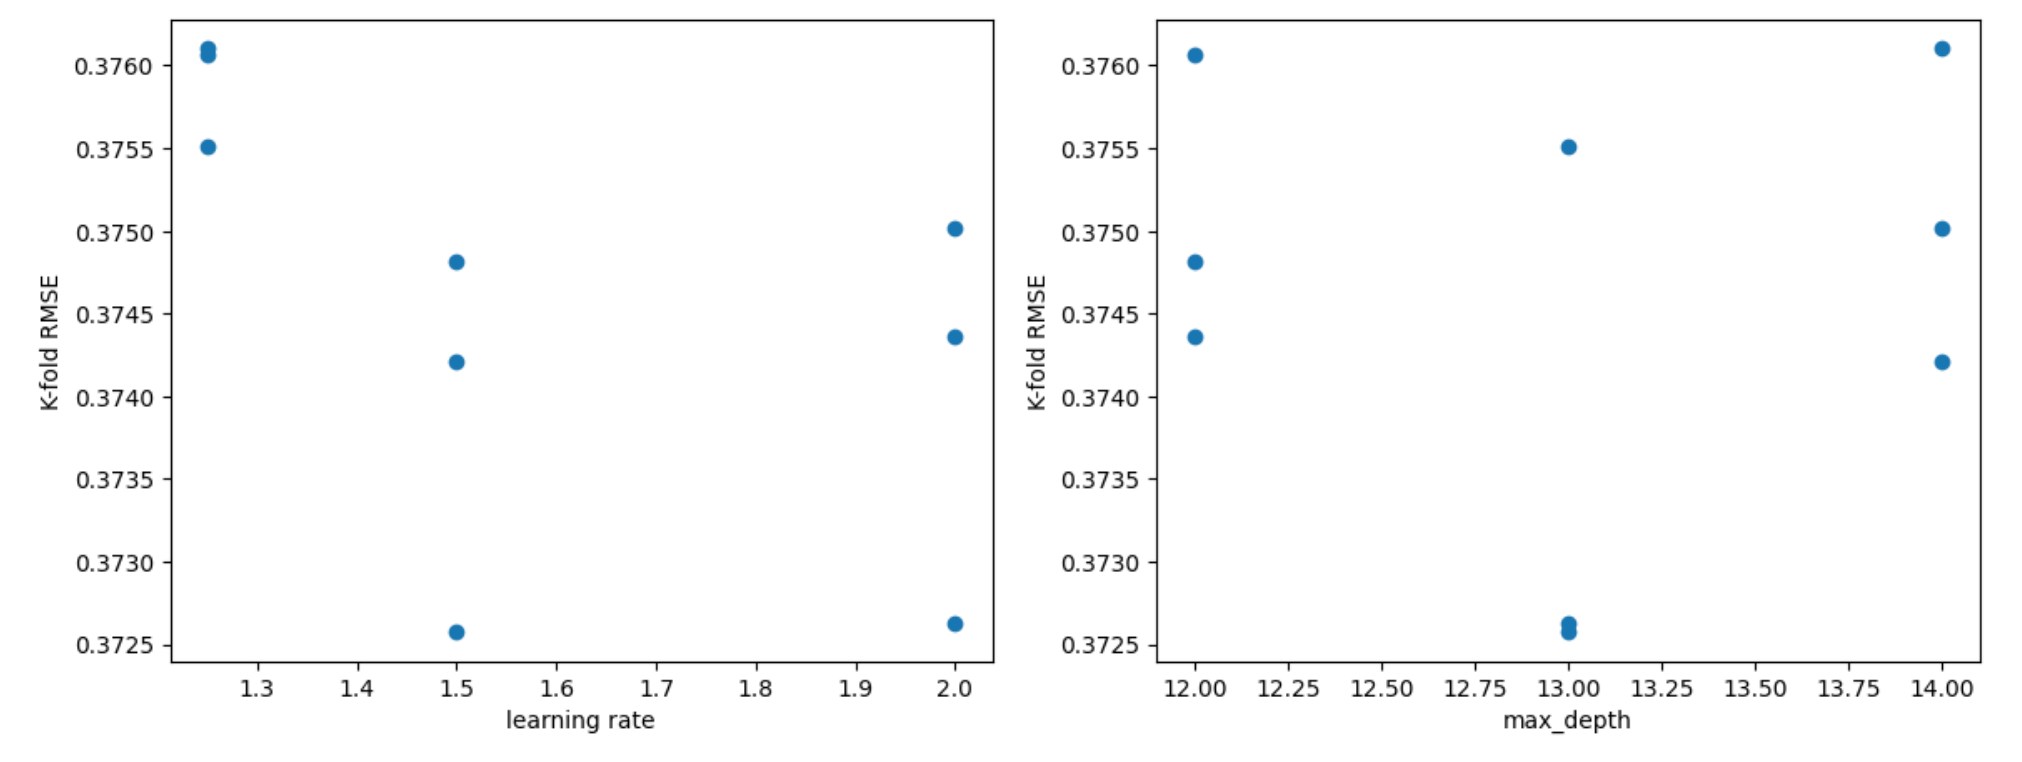

I found that a `max_depth` of 13 and `learning_rate` of 1.5 still gave the lowest RMSE. Using these optimal values, I next tuned `n_estimators`, considering the following values: 

In [ ]:
# N_estimators values considered
grid['n_estimators'] = [1000, 1500, 2000, 3000, 4000]

<div style="text-align: center;">
   <img width="45%" src="imgs/ada-5.png">
</div>

Using `n_estimators` equal to 2000 appeared to be best. However, when I calculated the RMSE using n_estimators as 1500 and 2000, I found that 1500 actually gave the lowest RMSE. I created an `AdaBoostRegressor` model using n_estimators as 1500, `max_depth` as 13, and learning_rate as 1.5, rounded the predictions to the nearest integer, and found that this model had an RMSE of 0.658.

### Gradient Boosting
*By Anastasia Wei* <br>

I used the `GradientBoostingRegressor` from the `sklearn.ensemble` modulo with the huber loss function for the model. First I used 5 fold cross validation to get a sense of the number of estimators I need to reach a stable cross validation RMSE and found that around 1500 trees will be sufficient.


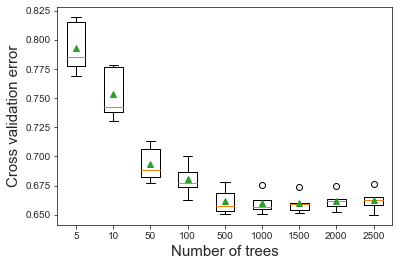


With this information, I started with a coarse grid search with 4 fold cross validation (to speed up the training process) using `RandomizedSearchCV` with 50 iterations. 

In [ ]:
# Parameter grid for gradient boosting model coarse grid search
grid['n_estimators'] = [1200, 1400, 1600, 1800]
grid['learning_rate'] = [0.1, 0.2, 0.3]
grid['max_depth'] = [8, 10, 12, 14]
grid['subsample'] = [0.4, 0.6, 0.8, 1]

I found a best cross validation RMSE of 0.6237 using `'subsample': 0.8, 'n_estimators': 1400, 'max_depth': 8, 'learning_rate': 0.1` and test RMSE of 0.6777. I visualized the parameters as follows:
 
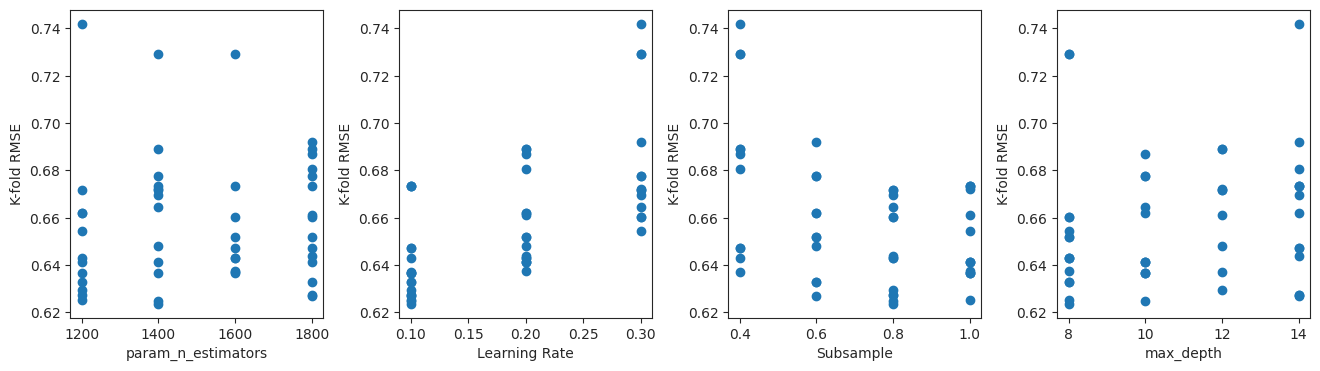

Then I implemented a finer tunning zooming in on the parameter space with the lowest k-fold RMSE. The search grid is as follows: 

In [ ]:
# Parameter grid for gradient boosting model fine grid search
grid['n_estimators'] = [1300, 1350, 1400, 1450, 1500]
grid['learning_rate'] = [0.8, 0.1, 0.15]
grid['max_depth'] = [8, 9, 10]
grid['subsample'] = [0.7, 0.8, 0.9, 1]

I found a best cross validation RMSE of 0.6204 using `'subsample': 0.8, 'n_estimators': 1300, 'max_depth': 9, 'learning_rate': 0.1` and test RMSE of 0.6713. I visualized the parameters as follows: 
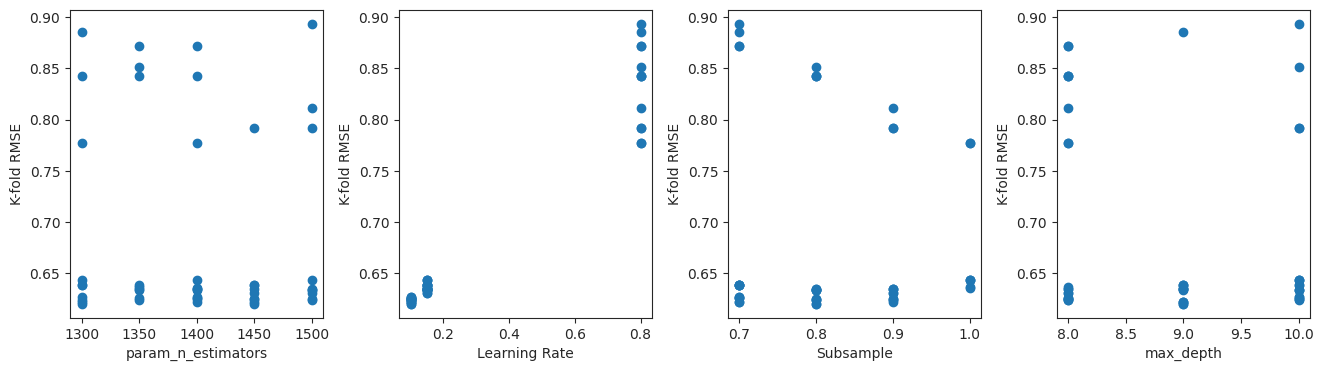

After this fine tuning, I did some manual tuning by making minor changes to the optimal parameters and combinations of parameters that are correlated (e.g. n_estimators and learning_rate) given by this tuning. However, the performance of the model did not change significantly. The only changed the improved the model significantly was increasing the subsample rate from 0.8 to 0.85. This resulted in a test RMSE of 0.6587.

### XGBoost
*By Amy Wang*

To tune an XGBoost model for the Vinho Verde dataset, I first conduct a broad sweep of the parameter space with `RandomizedSearchCV` with the following grid:

> param_grid = {'max_depth': [4, 5, 6, 7, 8, 9], <br>
>                'learning_rate': [0.01], <br>
>                'reg_lambda':[0, 10, 20, 30, 40, 70, 100], <br>
>                'n_estimators':[3000, 4000, 5000], <br>
>                'gamma': [0, 3, 5, 7, 10], <br>
>                'subsample': [0.5, 1.0], <br>
>                "colsample_bytree": [0.6, 0.75, 0.8, 0.9]}

I obtain this combination of optimal parameters `{'subsample': 1.0, 'reg_lambda': 0, 'n_estimators': 2000, 'max_depth': 8, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}`. An XGBoost model fit with these parameters predicted the test data with an RMSE of 0.6799. 

I visualize the plots of each parameter against the 5-fold cross-validated RMSE in attempt to manually tune the parameters (Appendix A6, Figure 1). Changing the parameters to  `{n_estimators = 4000, learning_rate = 0.01, subsample = 1.0, reg_lambda = 100, max_depth = 8, gamma = 0, colsample_bytree = 1.0}` based on the trends in the plots gave a higher RMSE of 0.6856.

The only clear insight gained from the plots was that the optimal learning rate is 0.01. I then conducted a second `RandomizedSearchCV` with a fixed learning rate of 0.01 and spanning a range of the other 6 variables. I used the following grid with 50 iterations:

> param_grid = {'max_depth': [4, 5, 6, 7, 8, 9], <br>
>                 'learning_rate': [0.01], <br>
>                 'reg_lambda':[0, 10, 20, 30, 40, 70, 100], <br>
>                 'n_estimators':[3000, 4000, 5000], <br>
>                 'gamma': [0, 3, 5, 7, 10], <br>
>                 'subsample': [0.5, 1.0], <br>
>                 'colsample_bytree': [0.6, 0.75, 0.8, 0.9]}

The optimal parameters obtained from this second search were `{'subsample': 0.5, 'reg_lambda': 0, 'n_estimators': 5000, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.75}`. A model fit with the optimal parameters from the second search gave an RMSE of 0.6598. Plotting the parameters against a 5-fold cross-validated RMSE showed that each parameter was already at its most optimal.

<div style="text-align: center;">
   <img width="80%" src="imgs/xgb2-1_plots.png">
   <img width="80%" src="imgs/xgb2-2_plots.png">
</div>

I explore hyperparameter tuning with Bayesian Optimization in attempt to lower the RMSE further (Appendix A6, Method 1). RandomizedSearchCV tests a random combination of the parameters in the grid, and therefore may have missed certain areas of the parameter space. Bayesian Optimization balances searching new areas of the parameter space with hyperfocusing on tuning the optimal parameters from optimal regions of the space. This method gave a higher RMSE than my best with RandomizedSearchCV, so I move forward with RandomizedSearchCV parameters. 




### CatBoost, and LightGBM
*By Anastasia Wei*

I fit the data with `CatBoostRegressor` model from the `catboost` package using the default parameters and it gave a train RMSE of 0.4761 and a test RMSE of 0.7131. Then I also fit the data with a `LGBMRegressor` model from the `lightbm` package using the default parameters. It yielded a train RMSE of 0.5211 and a test RMSE of 0.7259. 

We decided to include CatBoost and LightGBM models to (1) increase the diversity of the ensemble models and (2) see whether they will perform better than our other base models. However, these two models are additional base models and were included more for experimentation than the purpose of rigorous optimization (thus, we did not continue to optimize the CatBoost and LightGBM hyperparameters beyond their defaults). 

## Model Ensemble 

### Voting ensemble
*By Anastasia Wei* <br>

I used the `VotingRegressor` from `sklearn.ensemble` to create the voting ensemble model. I chose to only use the XGBoost, AdaBoost, Random Rorest, Gradient Boost, and Bagging Models in this ensemble as the other base models (CatBoost, LightGBM, Lasso, Ridge, MARS) had higher test RMSEs (> 0.7). 

The voting ensemble model yielded a test RMSE of 0.651 (lower than each of the individual models). (*See below for a plot of the actual vs predicted response*). 

<div style="text-align: center;">
   <img width="50%" src="imgs/voting-ens-img.png">
</div>

### Stacking ensemble
*By Anastasia Wei* <br>

I first fit each of the models mentioned about on the train and test dataset to create a new test and train datasets to fit the metamodels on. See the following subsections for the individual metamodels.

#### Linear Regression Metamodel
Using `LinearRegression` from `sklearn.LinearModels` on the new train data set, I obtained a test RMSE of 0.6714.

#### Lasso Metamodel
Using regularization parameter alphas in the range of `10**np.linspace(0, -3, 300)*0.5`, I tuned the model using LassoCV. With the optimal alpha of 0.0005, I obtained a test RMSE of 0.6598.

#### MARS Metamodel
I fit a MARS model using `Earth` from `pyearth` package with degree 1 to avoid overfitting. This gave a test RMSE of 0.6593.

#### Random Forest Metamodel
I tuned a random forest metamodel using the following parameter space with 4 fold cross validation with `RandomizedSearchCV` using 100 iterations. 

In [ ]:
# Parameter grid for Random Forest metamodel
param_grid = {'n_estimators': [100],
              'max_depth': [8, 10, 12, 14],
              'max_leaf_nodes':[100, 500, 1000],
              'max_features': [2, 4, 6, 8],
              'max_samples': [1000, 2000, 3000]}

This search yielded the following optimal parameters: `'n_estimators': 100, 'max_samples': 3000, 'max_leaf_nodes': 1000, 'max_features': 8, 'max_depth': 12`. The test RMSE is 0.6482 using these optimal parameters.

#### XGBoost Metamodel

I tuned a xgboost metamodel using the following parameter space with 4 fold cross validation with `RandomizedSearchCV` using 100 iterations. The parameter grid for this metamodel is detailed below:

In [ ]:
# Parameter grid for the XGBoost metamodel
param_grid = {'max_depth': [3, 4, 5, 6],
              'learning_rate': [0.008, 0.01, 0.025, 0.05],
              'reg_lambda':[0, 1, 5],
              'n_estimators':[500, 600, 800, 1000],
              'gamma': [0, 3, 5, 10],
              'subsample': [0.5, 0.75, 1.0],
              'colsample_bytree': [0.5, 0.75, 1.0]}

This search yielded the following optimal parameters: `'subsample': 0.75, 'reg_lambda': 0, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.008, 'gamma': 0, 'colsample_bytree': 1`. The metamodel's test RMSE is 0.6754 using these optimal parameters.

### Ensemble of ensembled models

Using the above 5 metamodels, I built a ensembled model of these metamodels using voting regression (i.ee., simply averaging the predictions). I then tuned the cutoff for rounding and found a optimal rounding threshold of 0.6869. Numbers with fractional amount greater than the threshold will be rounded up and vice versa. This resulted in a final rmse 0.6421, which is the lowest RMSE that we've achieved so far. (*See below for a plot of the actual vs predicted response for this final model*).

<div style="text-align: center;">
   <img width="50%" src="imgs/stack-ens-img.png">
</div>

## Limitations of the model with regard to prediction

If we had more time and resources, the following could be implemented to make our models' prediction ability better: <br>

1. The CatBoost and LGBM models can be tuned to perform better (as we used the default values for both models).

2. The Bayesian Optmization method of determining hyperparameters for the XGBoost model has potential for further optimization. We used the default number of iterations and initial points. These are hyperparameters of Bayesian optimization, and tuning these could result in better identification of hyperparameters that give a lower RMSE.

3. The ensemble models could perhaps perform better if we implemented models to predict the residuals for each metamodel (and adjusted our ensemble accordingly). If given more time, we could also tune the rounding threshold for each base model or metamodel, and use the optimized rounded predictions when ensembling.

4. We could also potentially build more ensemble models that are more distinct from each other to create the ensemble of the meta models.

In light of the time and resources available, however, we believe that we have optimized the 9 base models (Ridge Regression, Lasso Regression, MARS, Bagging Decision Trees, Decision Trees, Random Forest, AdaBoost, Gradient Boosting, and XGBoost) to the limit in terms of the techniques learned in class. Each model underwent multiple rounds of grid searches and manual tuning based on multiple-fold cross-validated RMSEs.

It is very convenient for our first and third stakeholder groups -- wine producers and oenologists/sommeliers -- to obtain the physicochemical properties of wines required as predictors for our model. Wine producers are required to certify their wines in order to sell the product on the market, and this process involves the analysis of the same physicochemical wine properties required by our model [2]. Therefore, our model leverages properties of wine that producers would have already obtained for certification. Wine certification and quality determination are both required processes for a wine to enter the market, so wine producers would be incentivized to share physicochemical traits with oenologists and sommeliers. The ability of our second stakeholder group, bar and restaurant owners, to obtain this information about wines may be more limited. It would be costly to run multiple laboratory tests on each bottle of wine sold. It would only be cost-permission for restaurant and bar owners to use our model if they too obtained the physicochemical information from wine producers. However, once the wine properties are obtained, all of our stakeholders can use our model immediately without any dependence on current events.

Our model will be useful to the wine industry in the foreseeable future, as it repurposees objective physicochemical metrics currently used to certify wines to also evaluate wine quality. Our model would become obsolete if the industry moves away from this method of wine certification, and it becomes costly to wine producers to determine physicochemical properties of their wines. Our model also risks becoming obsolete if the subjective assignments of quality strongly decouple from physicochemical properties in the future.

## Future Work

Future work in the wine quality prediction space may benefit from more recent data. Our dataset was amalgamated between 2004 and 2007, though new wines have been cultivated each year in the Vinho Verde region, with differing weather patterns and soil qualities that affect their chemical properties, taste, and quality. Modeling wine quality with more recent wines may better allow researchers to explore wines that are more likely being produced, bought, and consumed by the public today (though it is likely that many wines tested in this study are still being aged and consumed by the public, just to a smaller extent). Thus, one potential avenue of future inquiry within this research community could include studying wines from the last decade to study the qualities and chemical compositions of more recent wines -- especially amidst global warming, which affects weather patterns, soil qualities, and ultimately the chemical compositions of wines in regions like Vinho Verde [3].

## Conclusions and Recommendations to stakeholder(s)

From the development of our ensemble model, we conclude that our model can predict wine quality based on physicochemical properties with an RMSE of 0.642. This translates to the ability to correctly predict quality score with a $\pm 1$ error when considering rounding. 

While there remains much room for improvement, we posit that our model is and will be still generally useful for the wine industry, where expert but subjective opinions currently determine quality. There are many use cases where we recommend that our stakeholders implement our model. 

For wine producers, our model can help inform which grape strains to grow in order to produce the highest quality wines. Wine producers can analyze the physicochemical makeup of high quality wines, and grow new strains that with properties that emulate those wines. In addition, wine producers can use the model to determine wine quality before undergoing the certification process. If a certain wine is predicted to be of poor quality, it would be beneficial for wine producers to focus on other wines.


For restaurant and bar owners, the objective measure of quality can give a metric to determine appropriate pricing of the wines they purchase from producers. If able to obtain physicochemical properties independently of wine producers, restaurant owners can confirm the validity of wine quality reported by wine producers or sommeliers.

Finally, our model can assist oenologists and sommeliers make quicker, more standardized assessments of wine quality. The model's assessment serves as an auxilliary mechanism, another datapoint upon which these experts can weigh to determine the quality of wines. 

Our model is currently limited to predicting the quality of wines in the Vinho Verde region. Wines from different regions have distinct flavor profiles based on environmental and procedural factors determining wine production. This leads to distinct assignments of quality between different regions of the world. If the climate of the Vinho Verde region changes significantly in the future, we would need to obtain updated datapoints to retrain our model. In addition, we need to obtain more samples of wines that span the entire numerical range of quality 0-10, so that the model can directly learn from samples with qualities at the ends of the spectrum.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Kaitlyn Hung</td>
    <td>Decision Tree & AdaBoost</td>
    <td>EDA</td>    
    <td>EDA + visualizations of response and predictor distributions and relationship. Data preparation and approach.</td>
  </tr>
  <tr>
    <td>Amy Wang</td>
    <td>Random Forest & XGBoost</td>
    <td>Data Preparation</td>    
    <td>Researched context of the problem and our solution. Scaled and split the dataset.</td>
  </tr>
    <tr>
    <td>Anastasia Wei</td>
    <td>Ridge and Lasso Regression & Gradient Boosting</td>
    <td>Ensembling</td>    
    <td>Ensembling the metamodels, making the intercept model, and some EDA</td>
  </tr>
    <tr>
    <td>Lila Wells</td>
    <td>MARS and Bagging Decision Trees</td>
    <td>Presentation Assets & some EDA</td>    
    <td>Designed all presentation assets for the project presentation component. Some relevant EDA.</td> 
  </tr>
</table>

## References {-}

[1] Vinho Verde, "About Vinho Verde." https://www.vinhoverde.pt/en/about-vinho-verde. Supplied as additional material. 

[2] Cortez et. al, "Modeling wine preferences by data mining from physicochemical properties." Decision Support Systems (2009). https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub. Supplied as additional material. 

[3] Gambetta et. al, "Global warming and wine quality: are we close to the tipping point?" Vint and Wine Open Access Journal (2021). https://oeno-one.eu/article/view/4774. Supplied as additional material. 

[4] Data Analytics, VitalFlux. "MinMaxScaler vs StandardScaler – Python Examples." https://vitalflux.com/minmaxscaler-standardscaler-python-examples/#:~:text=Differences%20between%20MinMaxScaler%20and%20StandardScaler,-Both%20MinMaxScaler%20and&text=MinMaxScaler%20scales%20the%20data%20to,zero%20mean%20and%20unit%20variance. Supplied as additional material.

# Appendices {-}

## Appendix A: Modeling
Supplementary figures and procedures to contextualize decisions made to tune hyperparameters.

### A.0 Dataset Distributions and Relevant EDA

#### A.0.1 Tabular Distribution of Predictor Variables


<div style="text-align: center;">
   <img width="100%" src="imgs/predictor-distributions-tabular.png">
</div>

#### A.0.2 Tabular Distribution of Response Variable



|             | `type`     |
| ----------- | ----------- |
| Levels      | 2 (White, Red) |
| Missing values   | 0        |
| Number of unique values   | 2        |
| Frequency at all levels   | {White : 4898, Change: 1599}   |

#### A.0.3 Visualized Distribution of Red and White Wine Qualities

<div style="text-align: center;">
   <img width="80%" height="80%" src="imgs/response_dist.png">
</div>

#### A.0.4 Quartile-Quartile Plots for the First Four Predictors: Fixed Acidity, Volatile Acidity, Citric Acid, and Residual Sugar

<div style="text-align: center;">
   <img width="60%" height="60%" src="imgs/qq_plots.png">
</div>

#### A.0.5 Graphical Distributions of Predictor Variables (via Density Plots)

<div style="text-align: center;">
   <img width="60%" height="60%" src="imgs/pred_dist_w_title.png">
</div>

#### A.0.6 Alcohol, Density, and Volatile Acidity Plotted Against Quality

<div style="text-align: center;">
   <img width="90%" src="imgs/pred_vs_quality_2.png">
</div>

### A.1 MARS

#### A.1.1 Plotted Residuals Against Train Data Predictions

<div style="text-align: center;">
   <img width="60%" height="60%" src="imgs/residual_plot_MARS.png">
</div>

### A.2. Decision Tree

### A.3. Bagging Decision Trees

#### A.3.1 Number of Trees vs. R-Squared and RMSE

<div style="text-align: center;">
   <img width="90%" src="imgs/bagging-graph1.png">
</div>

#### A.3.2 Graphed Coarse Grid Hyperparameter Results vs. K-Fold RMSE

<div style="text-align: center;">
   <img width="90%" src="imgs/bagging-init-search.png">
</div>

#### A.3.3 Graphed Fine Grid Hyperparameter Results vs. K-Fold RMSE

<div style="text-align: center;">
   <img width="90%" src="imgs/bagging-fine-search.png">
</div>

### A.4. Random Forest

### A.5. AdaBoost

#### A.5.1. 5-Fold CV RMSE vs Hyperparameters Explored in the First GridSearchCV for AdaBoost

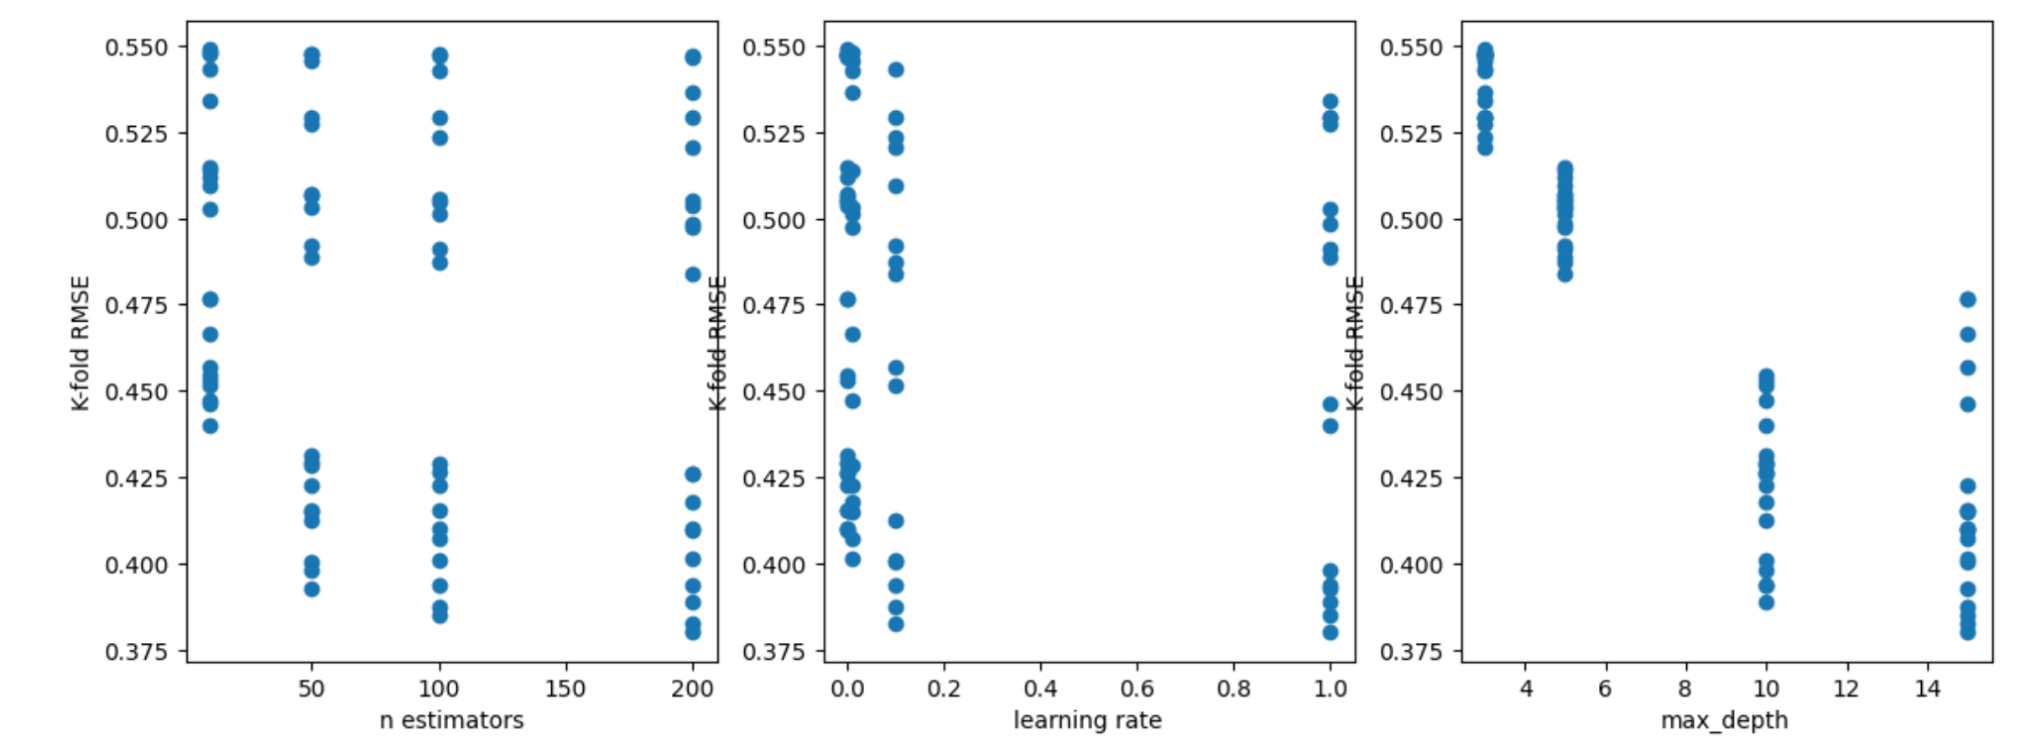


#### A.5.2 Second Pass of Hyperparameter Tuning for AdaBoost Modeling

In [ ]:
# Second pass parameters considered
grid['n_estimators'] = [200, 500, 1000]
grid['learning_rate'] = [.5, .75, 1.0]
grid['base_estimator__max_depth'] = [12,14,16]

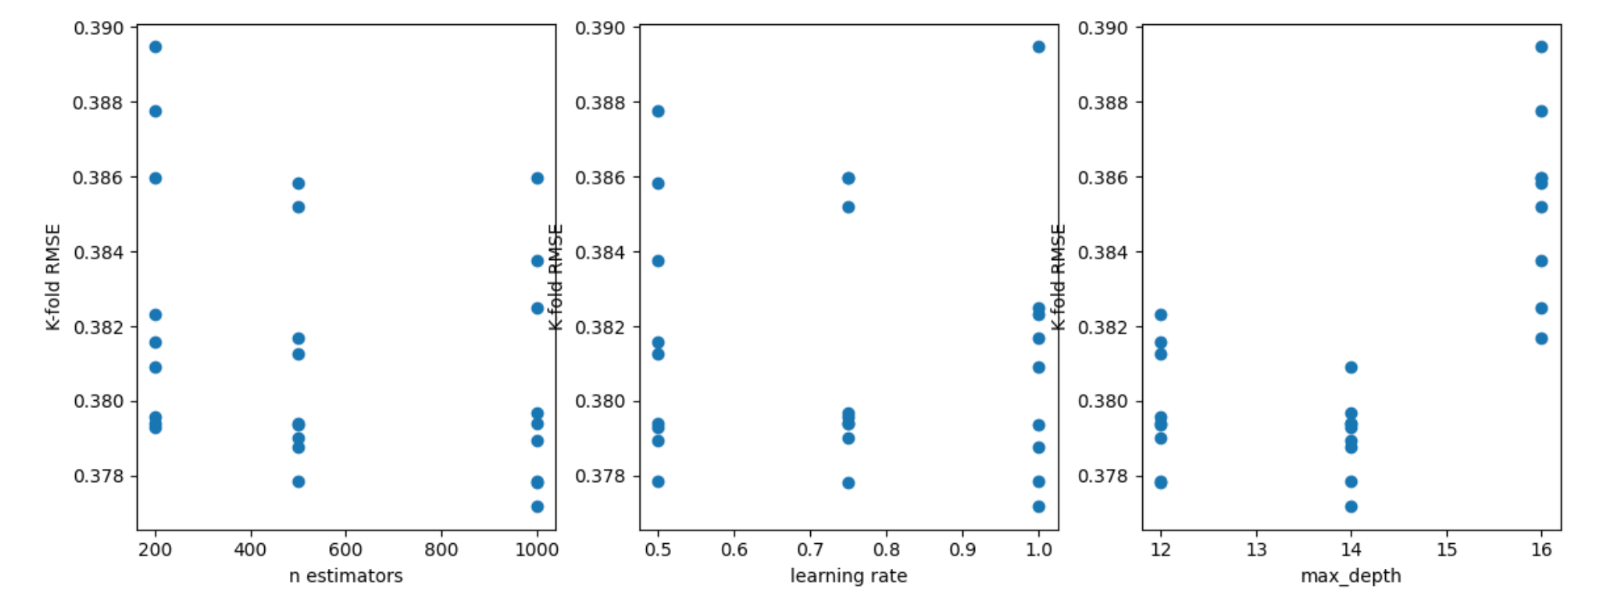


This gave the optimal hyperparameter values to be a `max_depth` of 14, `learning_rate` as 1.0, and `n_estimators` as 1000. I continued to narrow in to the optimal values with a finer grid search. 

#### A.5.3 Third Pass of Hyperparameter Tuning for AdaBoost Modeling

In [ ]:
# Finer grid search parameters considered
grid['n_estimators'] = [800, 1000, 1200, 1500]
grid['learning_rate'] = [.75, 1.0, 1.5]
grid['base_estimator__max_depth'] = [13, 14,15, 16]

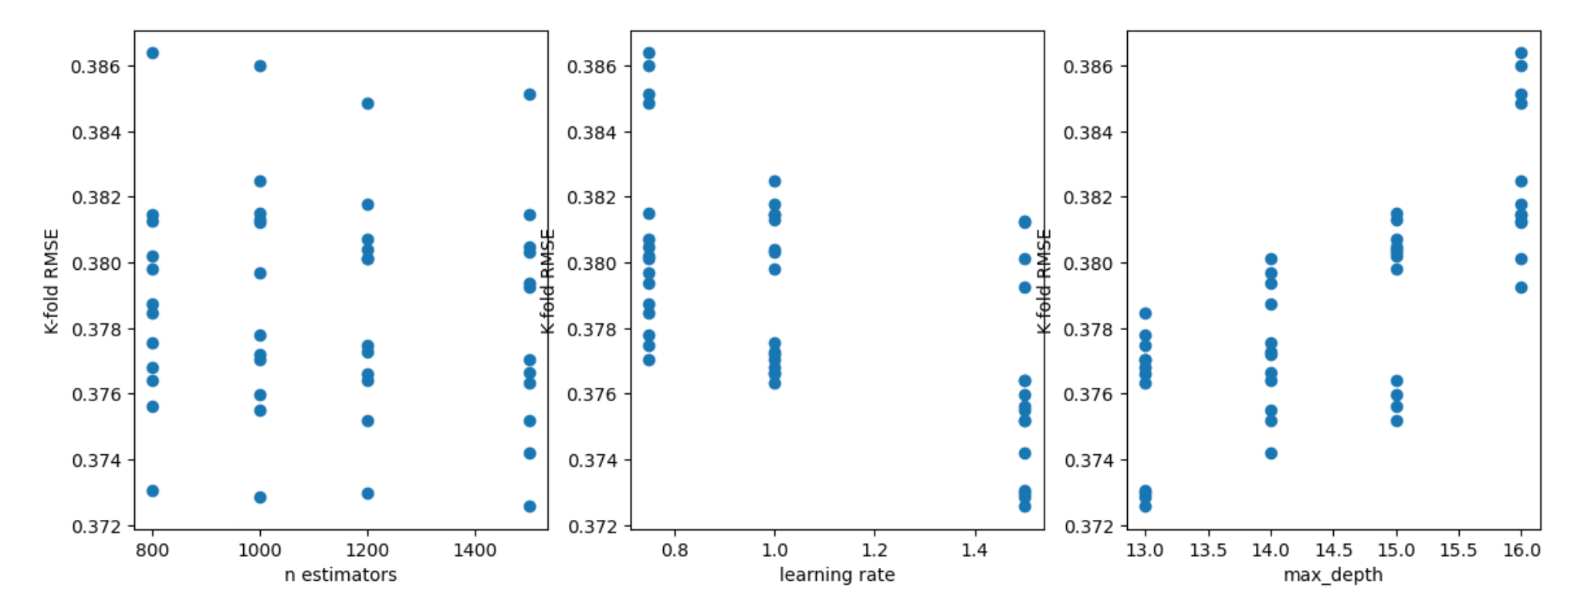

This gave the optimal values to be a `max_depth` of 13, `learning_rate` of 1.5, and `n_estimators` as 1500. As some of these values are at the end of the range, I increased the values I considered. I tuned `max_depth` and `learning_rate` separately from `n_estimators` as thus far, the highest value of `n_estimators` has been best. 

### A.6. Gradient Boosting

### A.7. XGBoost


<div style="text-align: center;">
   <img width="80%" src="imgs/xgb1-1_plots.png">
   <img width="80%" src="imgs/xgb1-2_plots.png">
</div>

Figure 1: 5-fold cross-validated RMSE vs. each parameter explored in the first RandomizedSearchCV for XGBoost.

Method 1: Bayesian Optimization <br>

With the following bounds, I conduct three Bayesian Optimization searches:

> pbounds = { <br>
>     'learning_rate': (0.001, 1.0), <br>
>     'n_estimators': (100, 4000), <br>
>     'max_depth': (3,10), <br>
>     'subsample': (0.3, 1.0), <br>
>     'gamma': (0, 10), <br>
>     'reg_lambda': (0, 100)}

With 10 iterations and 5 initial points, I get the optimal combination: `{'colsample': 0.926371203066647, 'gamma': 4.004543074048512, 'learning_rate': 0.105068050089807, 'max_depth': 6.815443879731223, 'n_estimators': 1315.404330702919, 'subsample': 0.4879450393211324}`. A model trained with these parameters gave a higher RMSE of 0.7390, so I decided to move forward with my best result from the RandomizedSearchCV results.